In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from tensorflow import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
import cv2
from os import listdir
import pandas as pd
from google.colab.patches import cv2_imshow
import numpy as np

Using TensorFlow backend.


In [0]:
from scipy import spatial

def cosine_similarity(value1, value2):
    """ Return the similarity score between new shift and past shifts. """
    similarity = 1 - spatial.distance.cosine(value1, value2)

    return similarity


In [4]:
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)





574717952/574710816 [==============================] - 6s 0us/step








In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
images = []
for i, image in enumerate(listdir('/content/drive/My Drive/real_val')):
  print(i)

  im = cv2.imread('/content/drive/My Drive/real_val/' + image)

  im_resize = cv2.resize(im, (224, 224))

  # Rescaling the images
  im_resize = im_resize / 255
  images.append(im_resize)

  if i > 1500:
    break

In [0]:
results = model.predict(np.array(images))

In [12]:
results.shape

(1502, 4096)

In [23]:
len(temp), len(tests)

(1502, 1501)

In [0]:
tests = pd.DataFrame()
tests['dir'] = listdir('/content/drive/My Drive/real_val')
tests = tests[0:1502]
temp = []
for i in results:
  temp.append(i)
tests['embed'] = temp

In [0]:
tests.to_csv('/content/drive/My Drive/cloth_embeddings.csv')

In [0]:
def return_most_similar(i):
  sims = []
  dirs = []
  a = tests.iloc[i]['embed']
  for _, data in tests.iterrows():
    similarity = cosine_similarity(data['embed'], a)
    dirs.append(data['dir'])
    sims.append(similarity)
  data = pd.DataFrame()
  data['dirs'] = dirs
  data['sims'] = sims
  return data.sort_values(['sims'], ascending=False).head(5)[1:]['dirs'].values

In [0]:
def display_similar_items(head, items):
  cv2_imshow(cv2.imread('/content/drive/My Drive/real_val/' + tests.iloc[head]['dir']))
  print('*' * 30)
  for item in items:
    cv2_imshow(cv2.imread('/content/drive/My Drive/real_val/' + item))

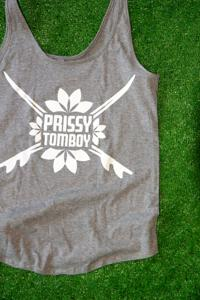

******************************


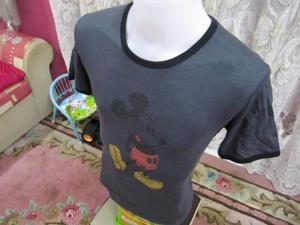

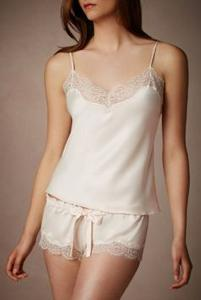

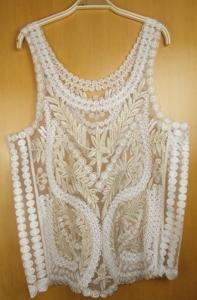

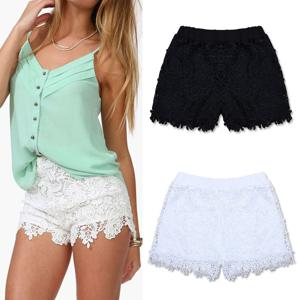

In [32]:
display_similar_items(500, return_most_similar(500))

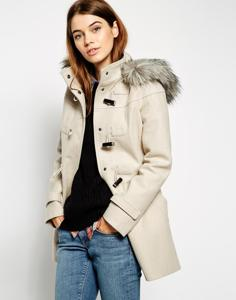

******************************


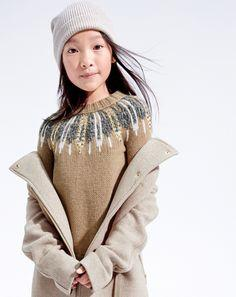

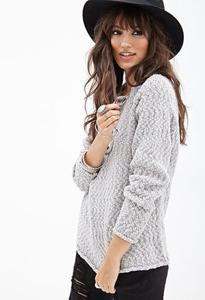

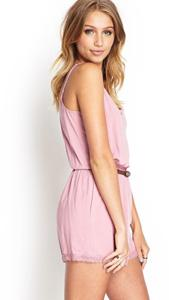

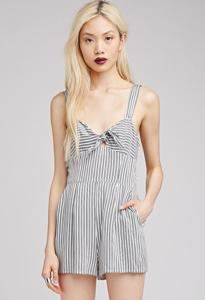

In [29]:
display_similar_items(99, return_most_similar(99))

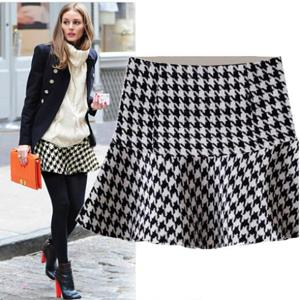

******************************


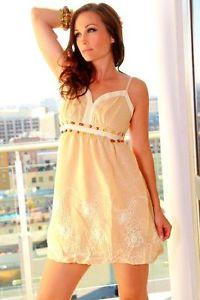

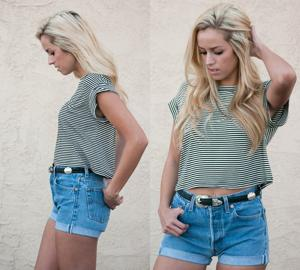

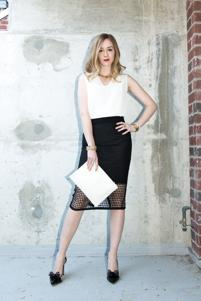

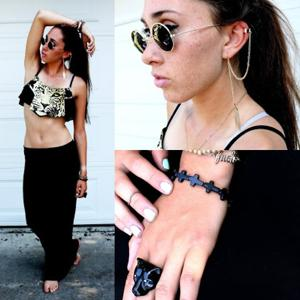

In [31]:
display_similar_items(1000, return_most_similar(1000))